In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
#reading the dataset
df = pd.read_csv("dataset/regression_data.csv", names=["id", "date", "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "waterfront", "view", "condition", "grade", "sqft_above", "sqft_basement", "yr_built", "yr_renovated", "zipcode", "lat", "long", "sqft_living15", "sqft_lot15", "price"])
df

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,10/13/14,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,12/9/14,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2/25/15,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,12/9/14,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2/18/15,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/14,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,6600060120,2/23/15,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,1523300141,6/23/14,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,291310100,1/16/15,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


### Checking dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  int64  
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [4]:
df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


In [5]:
df.isna().sum() #checking for NaNs

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

In [6]:
# Date column - changing the series type to datetime 
df['date'] = pd.to_datetime(df['date']) 

# Extracting month and year from the date column
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# Dropping date column
df = df.drop(['date', 'id', 'lat', 'long'], axis=1) 

In [7]:
# Zipcode changing into string (to treat it as categorical)
df['zipcode'] = df['zipcode'].apply(str)
df.dtypes

bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode           object
sqft_living15      int64
sqft_lot15         int64
price              int64
month              int64
year               int64
dtype: object

In [8]:
# checking correlations between features and target
df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
year             0.003727
month           -0.009928
Name: price, dtype: float64

In [9]:
#removing year and month since the correlation to price is very low (we have data from a short period of time)
df = df.drop(['month', 'year'], axis=1)  

## EDA

### Target variable - price

<Axes: xlabel='price', ylabel='Density'>

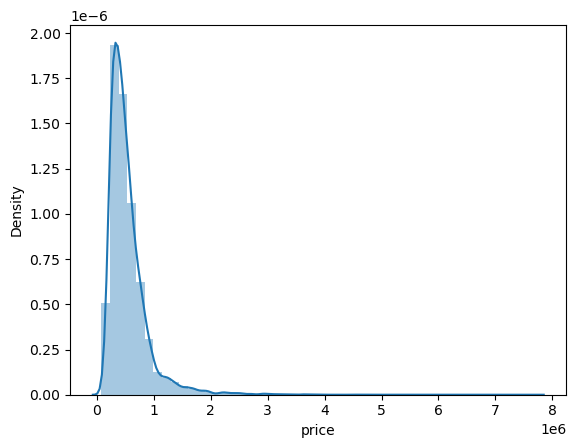

In [10]:
# checking price distribution
sns.distplot(df['price'])

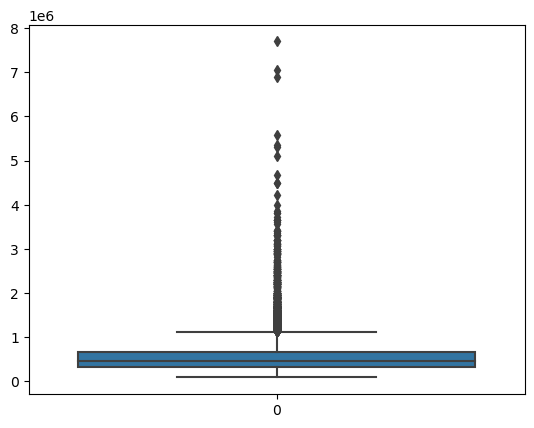

In [11]:
sns.boxplot(df['price'])
plt.show()

As seen on the plots above, our target variable - price - has a normal distribution yet with a long right skewness (a lot of outliers with high values) - this might require a further transformation. 

In [12]:
# We can take a closer look at the outliers for price by calculating lower and upper boundaries which can be then used as a filter to look at those outliers:
IQR = abs(np.quantile(df["price"], .25) - np.quantile(df["price"], .75)) * 1.5
lower_boundary = np.quantile(df["price"], .25) - IQR
upper_boundary = np.quantile(df["price"], .75) + IQR
lower_boundary, upper_boundary

(-162500.0, 1129500.0)

In [13]:
#price outliers filtered
df[(df["price"] > 1129500) | (df["price"] < -162500)].sort_values("price")

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
3101,4,3.00,3180,4649,2.0,0,0,4,9,2070,1110,1925,0,98105,2720,5980,1130000
7674,6,4.00,5330,18116,2.0,0,0,3,11,3950,1380,2000,0,98006,4590,16900,1130000
2444,5,3.50,3880,13885,2.0,0,3,4,9,2540,1340,1979,0,98006,3690,13885,1130000
13280,4,3.50,3170,4000,2.0,0,0,3,10,2340,830,1999,0,98112,1770,4000,1130000
1372,3,2.25,2790,13791,1.0,0,3,3,8,2790,0,2006,0,98166,2720,12600,1130000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,4600,21750,5350000
4407,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,3560,24345,5570000
9245,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,4540,42730,6890000
3910,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,3930,25449,7060000


In [14]:
# Saving high values price outliers as a separate dataframe 
high_price_df = df[(df["price"] > 1129500)].sort_values("price") 
high_price_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
3101,4,3.00,3180,4649,2.0,0,0,4,9,2070,1110,1925,0,98105,2720,5980,1130000
7674,6,4.00,5330,18116,2.0,0,0,3,11,3950,1380,2000,0,98006,4590,16900,1130000
2444,5,3.50,3880,13885,2.0,0,3,4,9,2540,1340,1979,0,98006,3690,13885,1130000
13280,4,3.50,3170,4000,2.0,0,0,3,10,2340,830,1999,0,98112,1770,4000,1130000
1372,3,2.25,2790,13791,1.0,0,3,3,8,2790,0,2006,0,98166,2720,12600,1130000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,4600,21750,5350000
4407,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,3560,24345,5570000
9245,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,4540,42730,6890000
3910,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,3930,25449,7060000


In [15]:
df.to_csv('high_price_df') #high price outliers saved (can be used by business for further analysis)

In [16]:
# Filtering houses above 650K and saving as a dataframe 
top_df = df[(df["price"] > 650000)].sort_values("price") 
top_df

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price
12378,2,1.00,1750,60872,1.0,0,0,4,7,1180,570,1973,0,98075,2480,5425,650100
17457,5,4.25,3920,11412,2.0,0,0,3,7,3920,0,1955,2005,98006,1400,9750,650500
10895,4,1.75,2340,5940,1.0,0,0,3,8,1290,1050,1953,0,98115,1930,5940,650500
4817,3,1.75,1740,4400,1.5,0,0,3,8,1740,0,1903,0,98122,1740,4400,650500
20207,3,2.50,2930,6050,2.0,0,0,3,9,2930,0,2008,0,98065,2760,5765,650880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,4600,21750,5350000
4407,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,3560,24345,5570000
9245,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,4540,42730,6890000
3910,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,3930,25449,7060000


In [17]:
top_df.corr()['price'].sort_values(ascending=False)[:50] #checking correlations to price for the houses above 650K

price            1.000000
sqft_living      0.606057
grade            0.504423
bathrooms        0.463602
sqft_above       0.463314
sqft_living15    0.369282
view             0.339186
waterfront       0.312399
sqft_basement    0.290405
bedrooms         0.202697
floors           0.122909
yr_renovated     0.104388
sqft_lot15       0.037170
sqft_lot         0.031003
yr_built         0.028809
condition        0.004363
Name: price, dtype: float64

### Features 

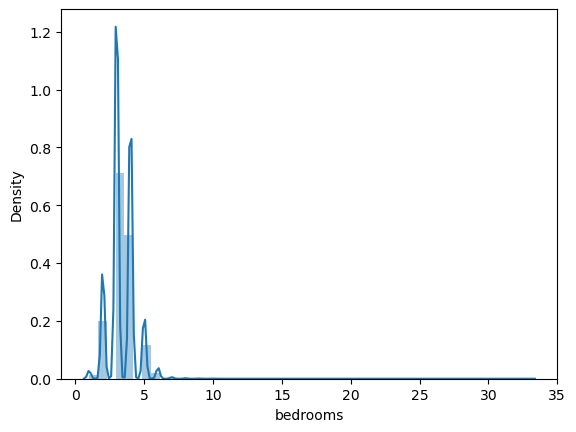

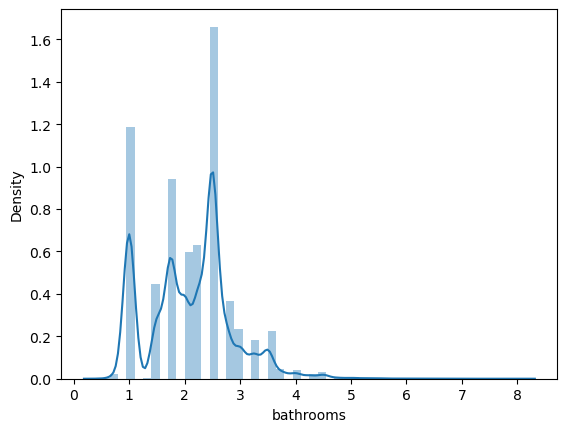

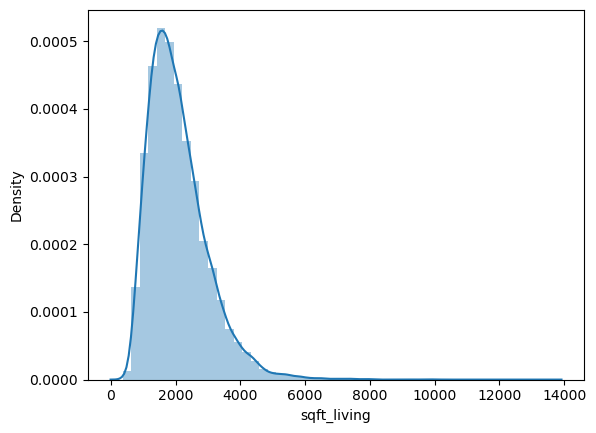

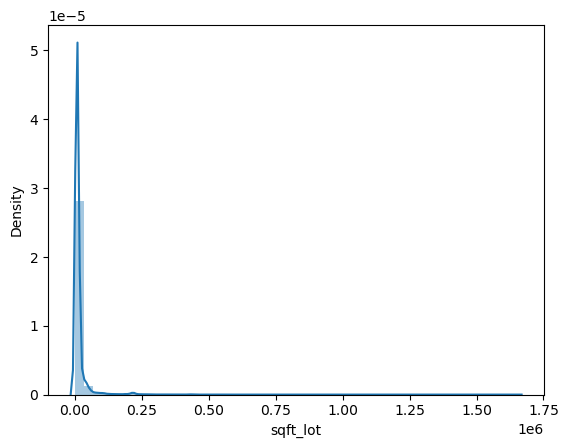

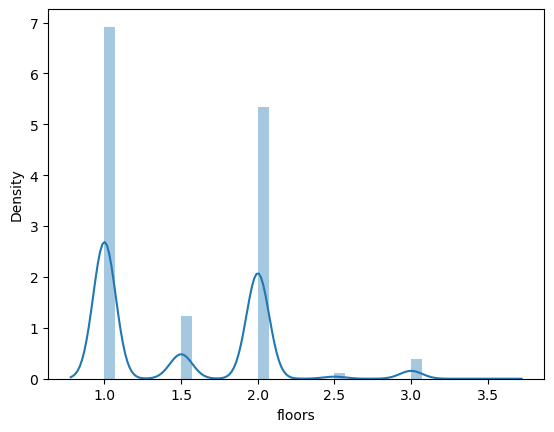

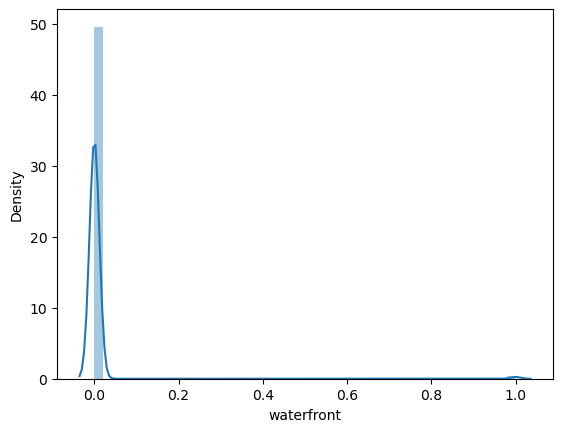

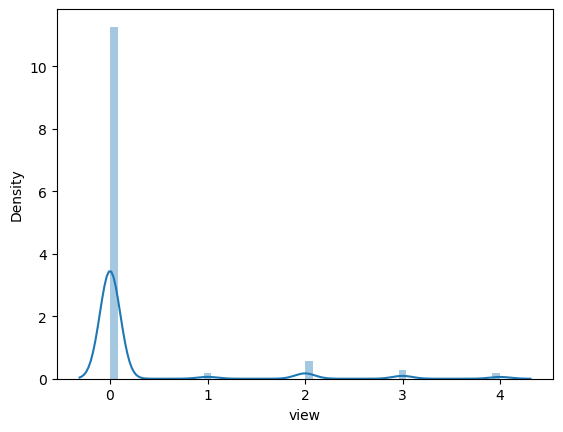

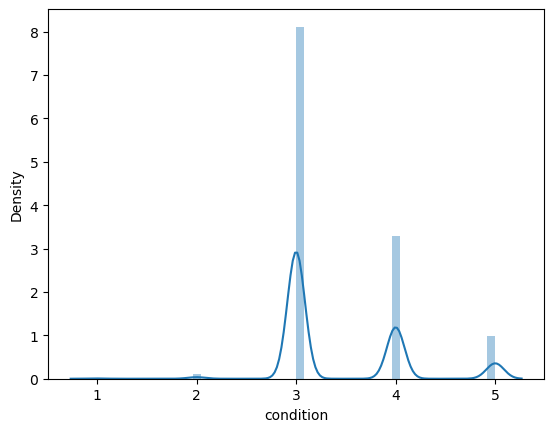

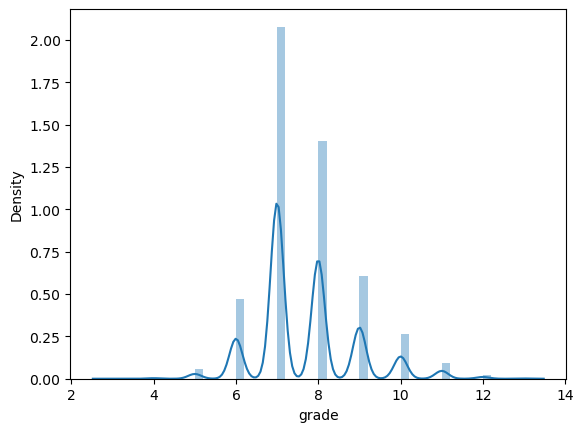

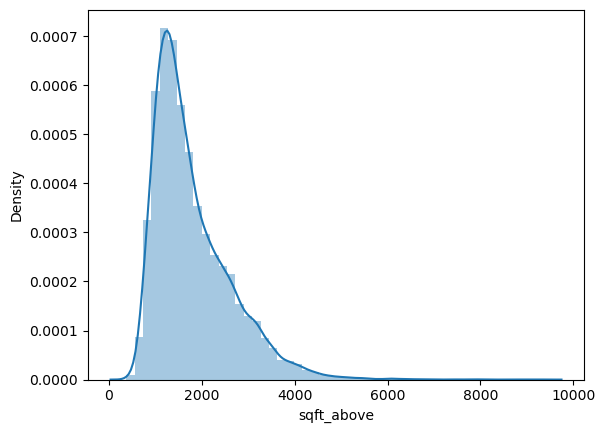

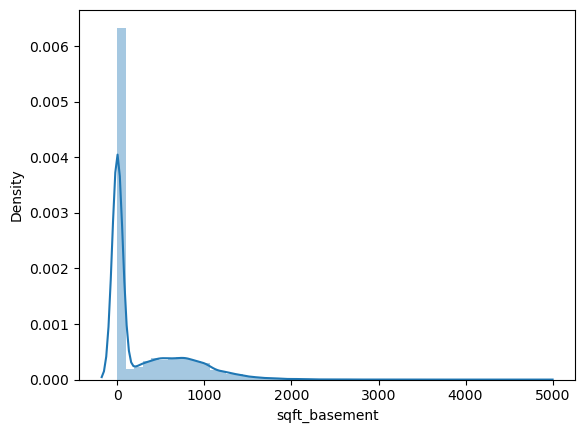

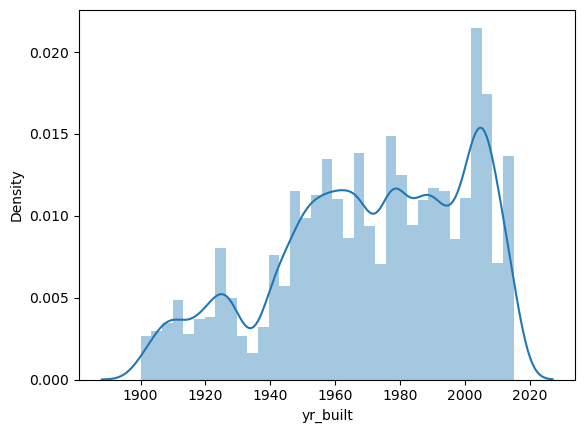

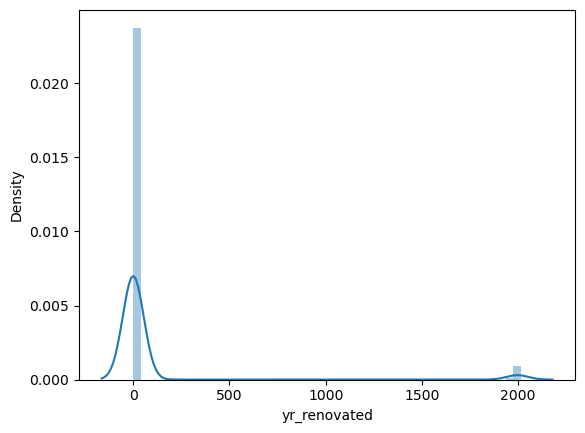

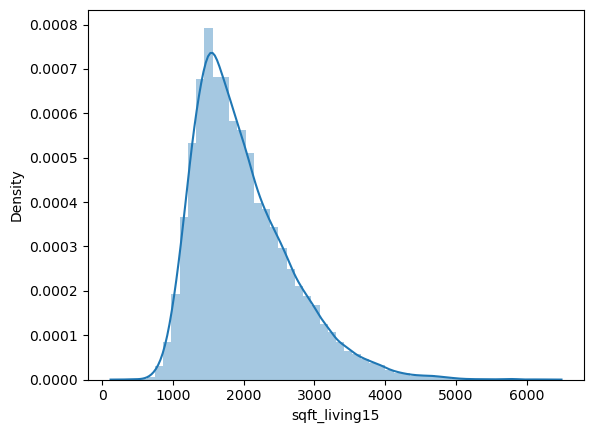

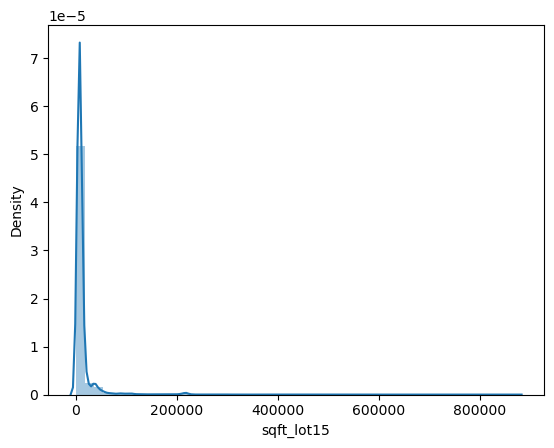

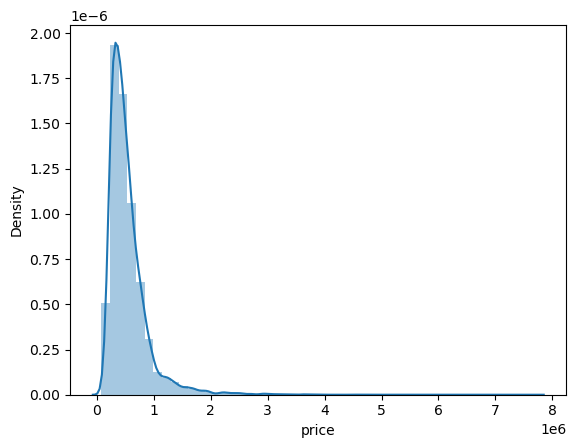

In [18]:
# Checking the distribution for numerical variables
numericals = df.select_dtypes("number")
for col in numericals.columns:
    sns.distplot(numericals[col])
    plt.show()

bedrooms    0.308787
dtype: float64


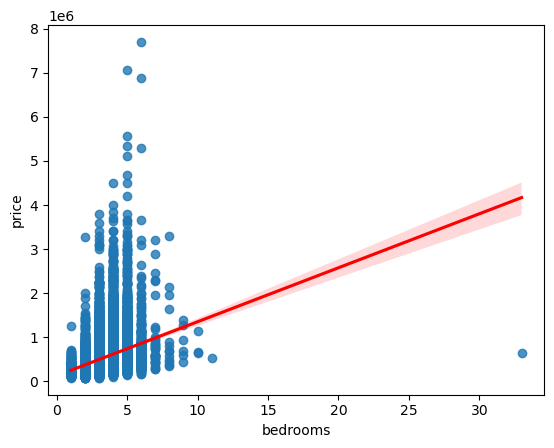

bathrooms    0.525906
dtype: float64


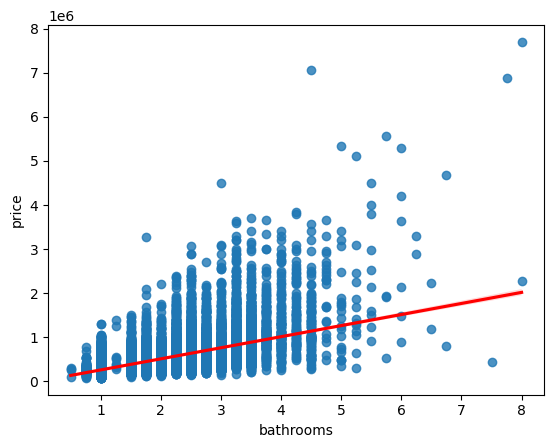

sqft_living    0.701917
dtype: float64


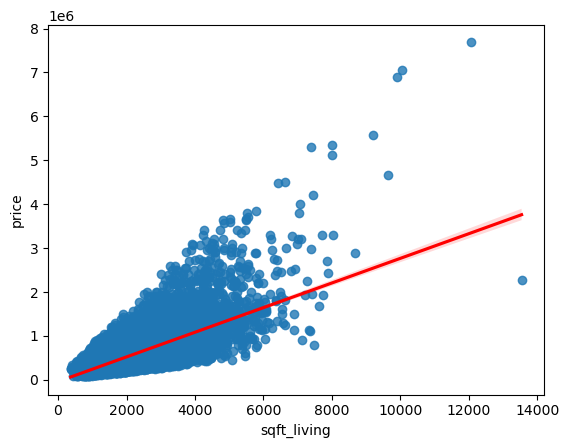

sqft_lot    0.089876
dtype: float64


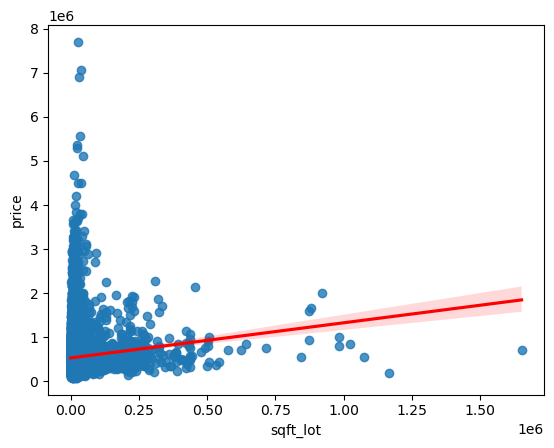

floors    0.256804
dtype: float64


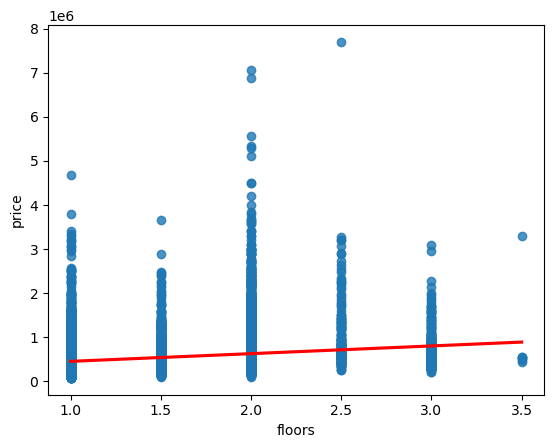

waterfront    0.266398
dtype: float64


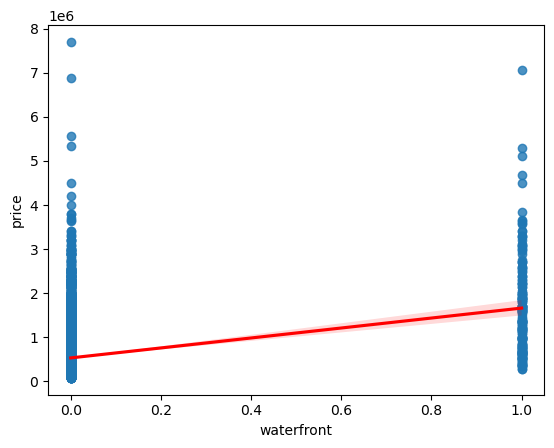

view    0.39737
dtype: float64


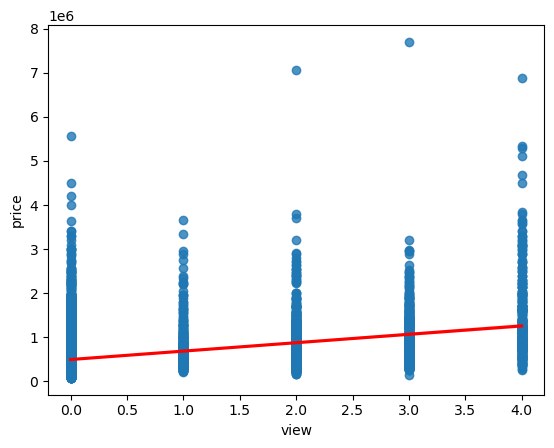

condition    0.036056
dtype: float64


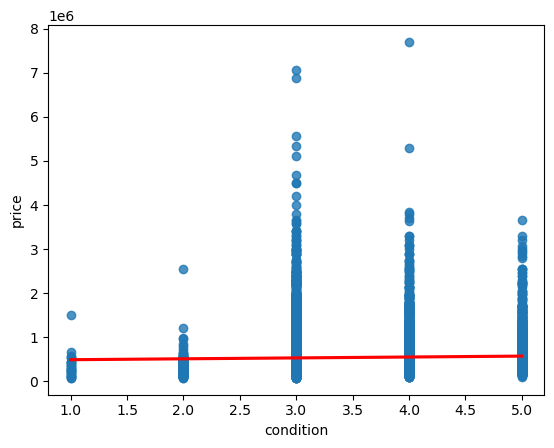

grade    0.667951
dtype: float64


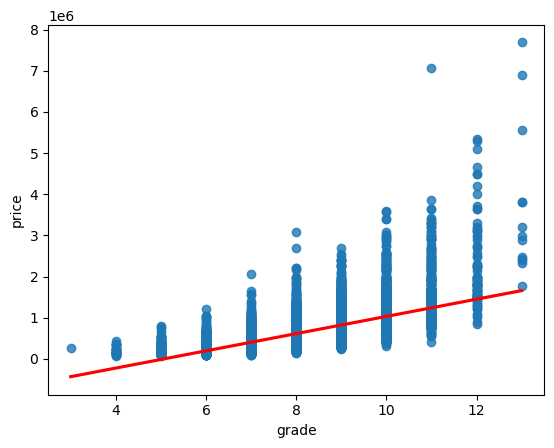

sqft_above    0.605368
dtype: float64


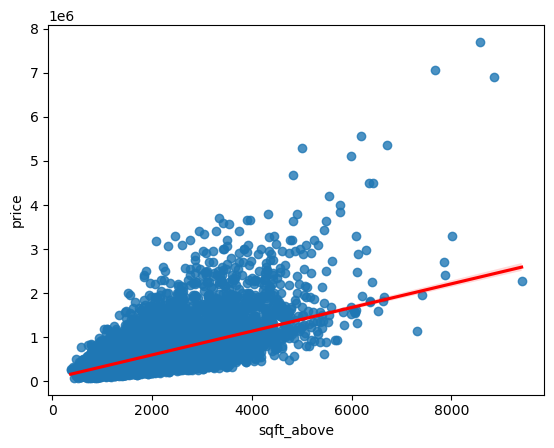

sqft_basement    0.323799
dtype: float64


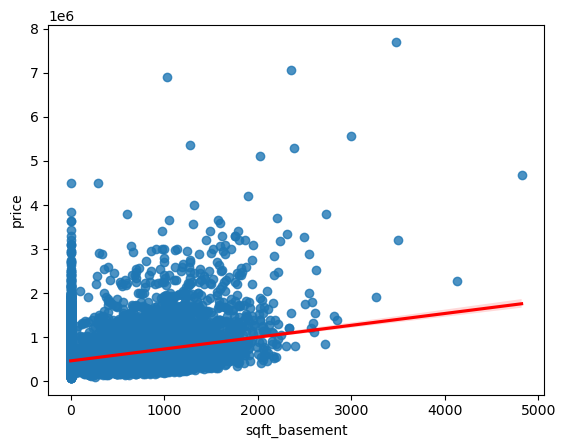

yr_built    0.053953
dtype: float64


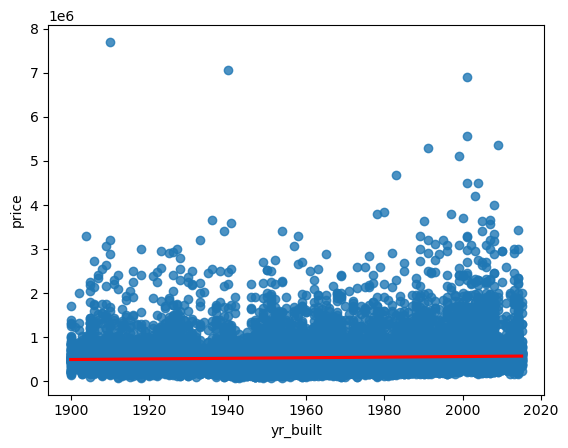

yr_renovated    0.126424
dtype: float64


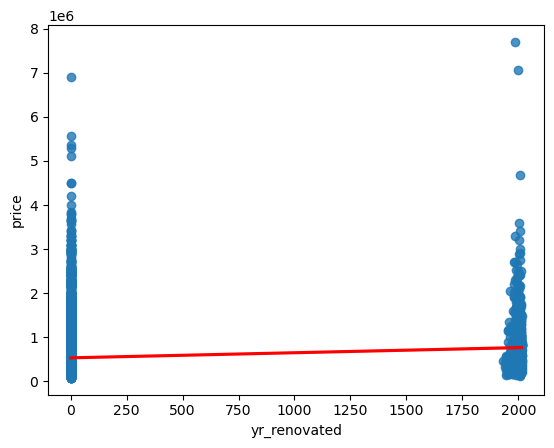

sqft_living15    0.585241
dtype: float64


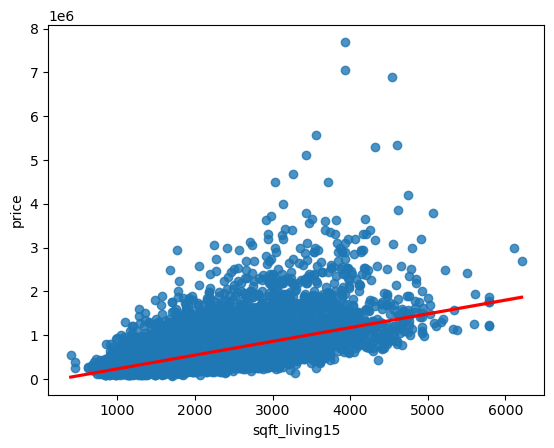

sqft_lot15    0.082845
dtype: float64


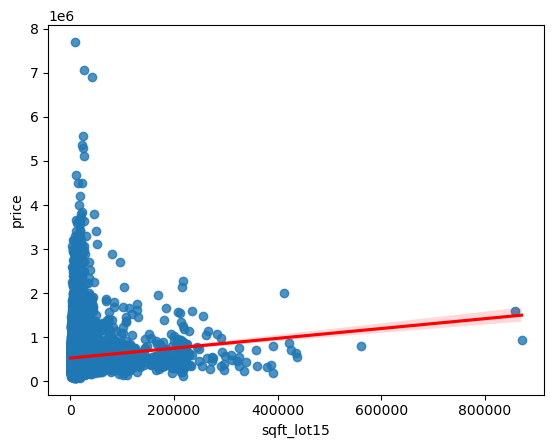

price    1.0
dtype: float64


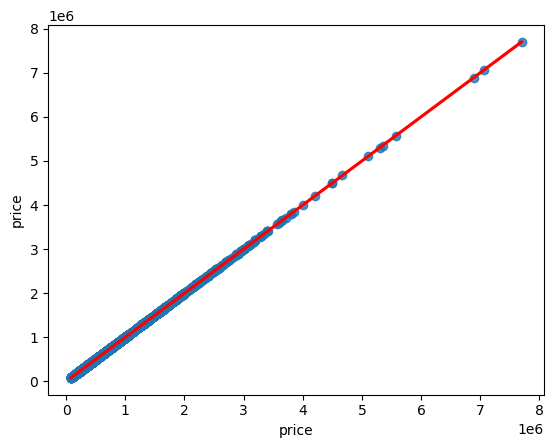

In [19]:
# Checking the relationships between numerical features and the target: 
for col in numericals.columns:
  print(df[[col]].corrwith(df["price"]))
  sns.regplot(x=df[col], y=df["price"], line_kws={"color": "red"})
  plt.show()

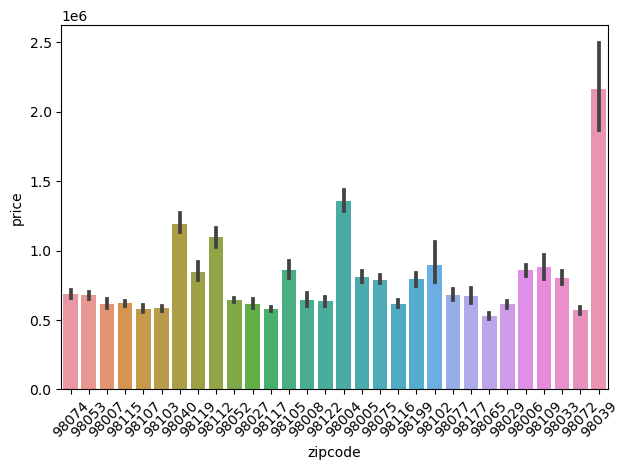

In [20]:
# checking median price per zipcodes with median price above 650K
median_prices = df.groupby('zipcode')['price'].median().reset_index()
# creating filter for zipcodes based on the median price and creating df for it
high_price_zipcodes = median_prices[median_prices['price'] > 500000]['zipcode']
high_price_df = df[df['zipcode'].isin(high_price_zipcodes)]
# creating the bar plot for filtered df
sns.barplot(x=high_price_df['zipcode'], y=high_price_df['price'])
plt.xticks(rotation=45)
plt.figsize=(40, 10)
plt.tight_layout()
plt.show()

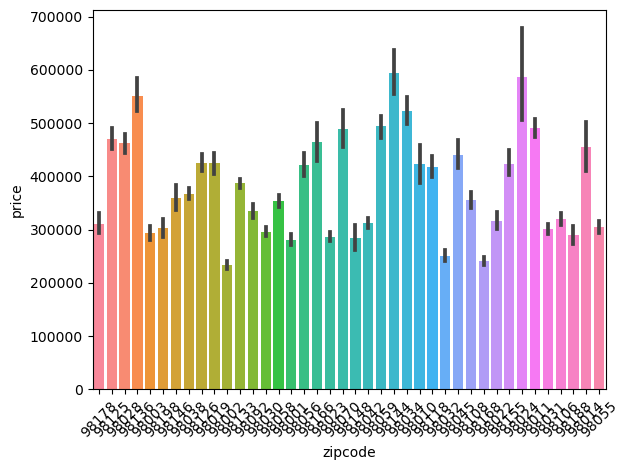

In [21]:
# checking median price per zipcodes with median price below 650K
median_prices = df.groupby('zipcode')['price'].median().reset_index()
# creating filter for zipcodes based on the median price and creating df for it
low_price_zipcodes = median_prices[median_prices['price'] < 500000]['zipcode']
low_price_df = df[df['zipcode'].isin(low_price_zipcodes)]
# creating the bar plot for filtered df
sns.barplot(x=low_price_df['zipcode'], y=low_price_df['price'], saturation=1, dodge=False)
plt.xticks(rotation=45)
plt.figsize=(40, 10)
plt.tight_layout()
plt.show()

In [22]:
# encoding the categorical variable (Zipcode)
df_final = pd.get_dummies(df, drop_first=True)
df_final

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,221900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,538000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,180000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,604000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,510000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509,360000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21593,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200,400000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
21594,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,1020,2007,402101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
21595,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,1410,1287,400000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


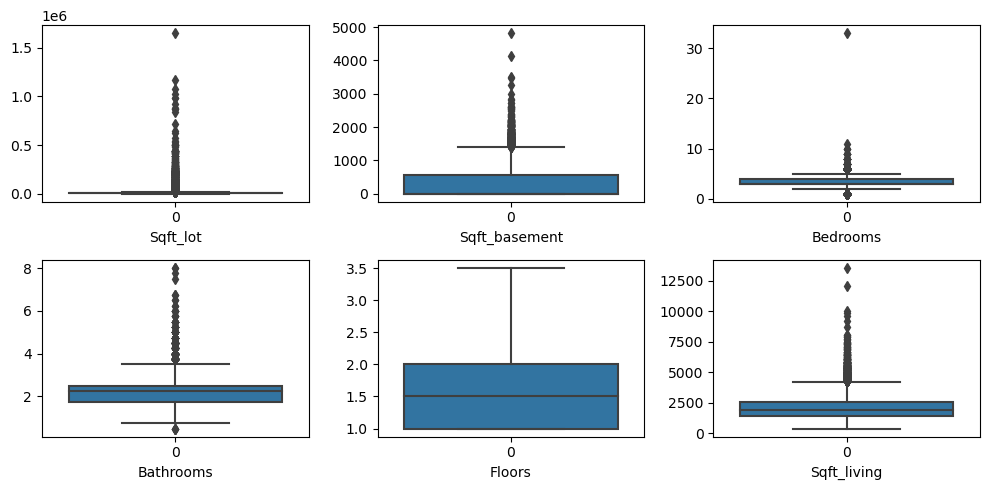

In [23]:
# Checking the outliers for selected features: 
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(df_final['sqft_lot'], ax = axs[0,0])
plt2 = sns.boxplot(df_final['sqft_basement'], ax = axs[0,1])
plt3 = sns.boxplot(df_final['bedrooms'], ax = axs[0,2])
plt4 = sns.boxplot(df_final['bathrooms'], ax = axs[1,0])
plt5 = sns.boxplot(df_final['floors'], ax = axs[1,1])
plt6 = sns.boxplot(df_final['sqft_living'], ax = axs[1,2])
plt1.set_xlabel('Sqft_lot')
plt2.set_xlabel('Sqft_basement')
plt3.set_xlabel('Bedrooms')
plt4.set_xlabel('Bathrooms')
plt5.set_xlabel('Floors')
plt6.set_xlabel('Sqft_living')


plt.tight_layout()

## Benchmark model 

In [24]:
# spliting the data, using the final dataset (with outliers included)
from sklearn.model_selection import train_test_split
X = df_final.drop(['price'], axis=1)
y = df_final['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
753,2,2.50,2380,6600,1.0,0,0,3,8,2380,0,2010,0,1870,6600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1418,4,3.75,3190,17186,2.0,1,4,3,10,3190,0,1999,0,2290,13496,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8178,3,2.50,1730,6930,2.0,0,0,3,8,1730,0,1994,0,1780,6930,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2254,4,2.00,1870,8750,1.0,0,2,3,7,1870,0,1977,0,1770,8207,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4063,8,3.00,2850,12714,1.0,0,0,3,7,2850,0,1959,0,1480,4942,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,3,2.50,2230,5800,2.0,0,0,3,7,2230,0,2004,0,2230,6088,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21575,4,2.75,2770,3852,2.0,0,0,3,8,2770,0,2014,0,1810,5641,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5390,4,1.50,1530,9000,1.0,0,0,4,6,1530,0,1976,0,1520,8500,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
860,1,0.75,380,15000,1.0,0,0,3,5,380,0,1963,0,1170,15000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [25]:
# training model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
lm = LinearRegression()
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)
print("R2_score:", round(r2_score(y_test, predictions), 2)) 
print("RMSE:", rmse)
print("MAE:", mae)

R2_score: 0.8
RMSE: 164236.2137126439
MAE: 96385.5826213629


<Axes: ylabel='price'>

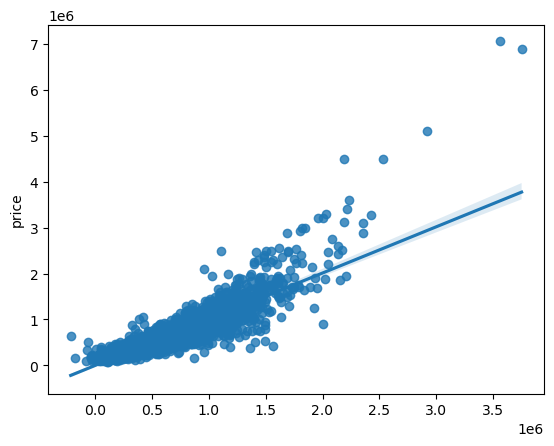

In [26]:
sns.regplot(x=predictions, y=y_test)

The initial R2 of 0.8 is good. Prediction errors are not too high (considering the average price of a house) but when we look at the RMSE, we can see that it is affected by the outliers in the dataset (to be addressed in the next steps). 

## Scaling

### StandardScaler

In [27]:
# spliting the data, using the final dataset (with outliers included)
from sklearn.model_selection import train_test_split
X = df_final.drop(['price'], axis=1)
y = df_final['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
X_train

# applying StandardScaler 
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X = StandardScaler().fit_transform(X)
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# training the model with scaler data
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)
predictions = lm.predict(X_test_scaled)
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)
print("R2_score:", round(r2_score(y_test, predictions), 2)) 
print("RMSE:", rmse)
print("MAE:", mae)

R2_score: 0.8
RMSE: 164239.39590433866
MAE: 96395.75616389603


<Axes: ylabel='price'>

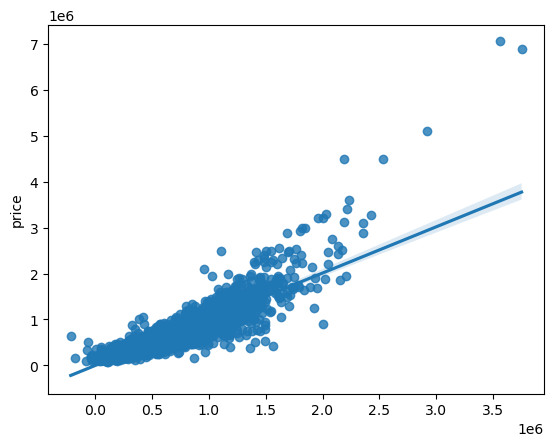

In [28]:
sns.regplot(x=predictions, y=y_test)

Very little impact of StScaler on the model - R2 and MAE remained unchanged, slight change in RMSE. 

### Log transformation 
Considering the high number of outliers, we can try to scale price variable using log transformation. It is a good technique for treating skewed data. 

In [29]:
df1 = df_final.copy()
df1['price'] = df1['price'].apply(np.log)

<Axes: xlabel='price', ylabel='Density'>

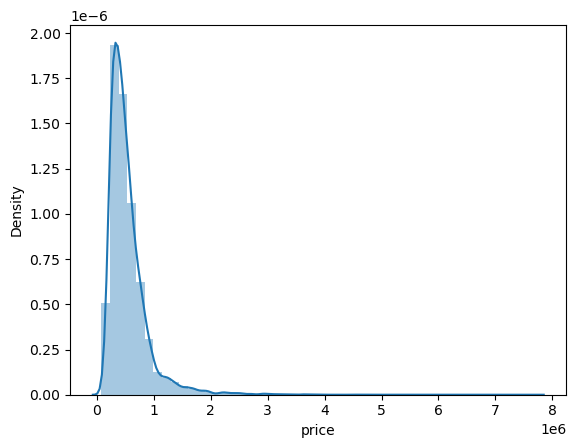

In [30]:
#before scaling: 
sns.distplot(df_final['price'])

<Axes: xlabel='price', ylabel='Density'>

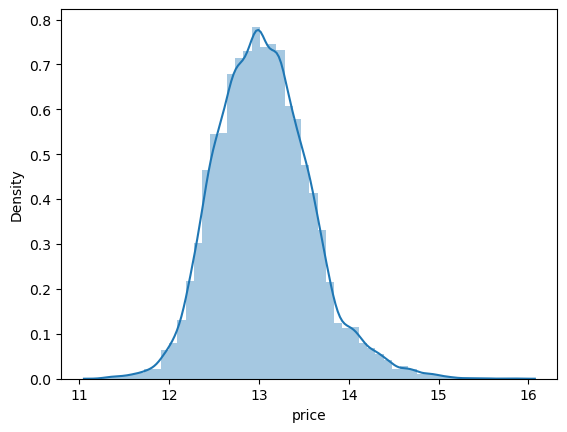

In [31]:
#after scaling: 
sns.distplot(df1['price'])

In [32]:
X = df1.drop(['price'], axis=1)
y = df1["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

predictions = lr.predict(X_test_scaled)
print("R2_score:", round(r2_score(y_test, predictions), 2)) 
print("MAE:", mean_absolute_error(predictions, y_test))
print("RMSE:", mean_squared_error(predictions, y_test, squared=False))

R2_score: 0.87
MAE: 0.13508130505266178
RMSE: 0.18477108087221775


In [33]:
# target variable was scaled (log) so we need to inverse it to see the actual values: 
y_test_unscaled = y_test.apply(lambda x: np.exp(x))
predictions_unscaled = pd.Series(predictions).apply(lambda x: np.exp(x))

rmse = mean_squared_error(y_test_unscaled, predictions_unscaled, squared=False)
mae = mean_absolute_error(y_test_unscaled, predictions_unscaled)
print("MAE:", mae)
print("RMSE:", rmse)

MAE: 75542.01224562456
RMSE: 150048.204007152


<Axes: ylabel='price'>

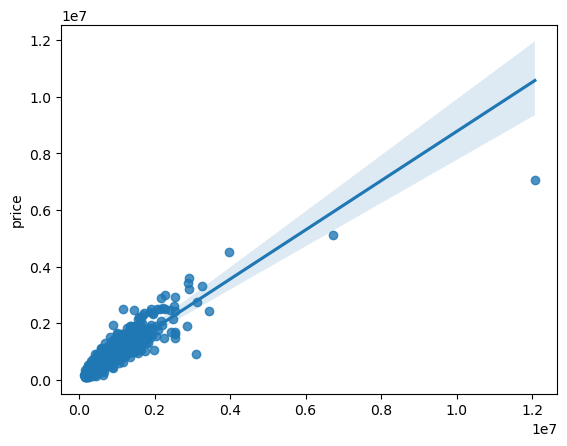

In [34]:
sns.regplot(x=predictions_unscaled, y=y_test_unscaled)

Thanks to the log transformation on price, R2 improved significantly (so model works better). 

### Model after removing outliers

In [35]:
#function to remove outliers on selected columns
def remove_outliers (df, columns):
    df_cleaned = df.copy()
    for col in columns:
        col_values = df_cleaned[col]
        Q1 = col_values.quantile(0.25)
        Q3 = col_values.quantile(0.75)
        IQR = Q3 - Q1
        df_cleaned[col] = col_values[(col_values >= Q1 - 1.5*IQR) & (col_values <= Q3 + 1.5*IQR)]
    return df_cleaned.dropna()

In [36]:
df2 = remove_outliers(df1, ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_basement'])

In [37]:
from sklearn.model_selection import train_test_split
X = df2.drop(['price'], axis=1)
y = df2['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
11223,3.0,2.50,2000.0,8057.0,1.0,0,0,3,8,1360,640.0,1998,0,2530,8964,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18267,3.0,2.50,3320.0,11875.0,1.0,0,0,5,10,3320,0.0,1979,0,3730,11875,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8953,4.0,2.25,3190.0,11597.0,2.0,0,0,3,10,2300,890.0,1984,0,2990,10679,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5727,3.0,2.50,1610.0,1728.0,3.0,0,0,3,8,1610,0.0,2000,0,1540,3090,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16166,3.0,2.00,2060.0,4437.0,1.0,0,0,3,7,1030,1030.0,1929,0,1750,4452,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13628,3.0,2.00,1769.0,9300.0,1.0,0,0,4,7,1769,0.0,1955,2009,1870,10226,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
14426,2.0,1.00,1120.0,6380.0,1.0,0,0,3,7,1120,0.0,1942,1994,1230,6380,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6550,3.0,1.00,1010.0,8906.0,1.0,0,0,5,7,1010,0.0,1968,0,1150,10414,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1039,2.0,1.00,1600.0,8961.0,1.0,0,0,4,7,1390,210.0,1949,0,1502,6798,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
lm = LinearRegression()
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)
print("R2_score:", round(r2_score(y_test, predictions), 2)) 
print("RMSE:", rmse)
print("MAE:", mae)

R2_score: 0.87
RMSE: 0.16889856131913825
MAE: 0.12508534613446548


In [39]:
# target variable was scaled (log) so we need to inverse it to see the actual values: 
y_test_unscaled = y_test.apply(lambda x: np.exp(x))
predictions_unscaled = pd.Series(predictions).apply(lambda x: np.exp(x))

rmse = mean_squared_error(y_test_unscaled, predictions_unscaled, squared=False)
mae = mean_absolute_error(y_test_unscaled, predictions_unscaled)
print("MAE:", mae)
print("RMSE:", rmse)

MAE: 60539.574082985535
RMSE: 92483.78580346375


<Axes: ylabel='price'>

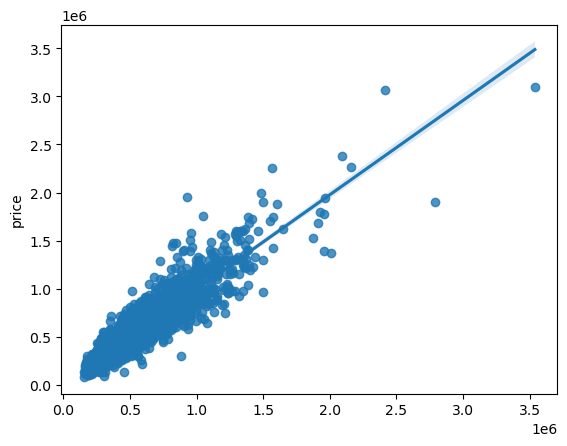

In [40]:
sns.regplot(x=predictions_unscaled, y=y_test_unscaled)

R2 is slightly lower compared to the model with outliers but we have lower errors. 
In the next steps we'll check if we can improve those results through feature selection. 

## Feature selection

In [41]:
df3 = df.copy() #data copy before removing outliers and encoding zipcode

In [42]:
# feature importance 
df3.corr()['price'].sort_values(ascending=False)[:50]

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.397370
sqft_basement    0.323799
bedrooms         0.308787
waterfront       0.266398
floors           0.256804
yr_renovated     0.126424
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
Name: price, dtype: float64

In [43]:
#correlation between features
correlations_matrix = df.corr()
correlations_matrix = correlations_matrix[((correlations_matrix > .8) | (correlations_matrix < -.8))]
correlations_matrix.fillna(0)[:20]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price
bedrooms,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
bathrooms,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
sqft_living,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.876448,0.0,0.0,0.0,0.0,0.0,0.0
sqft_lot,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
floors,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
waterfront,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
condition,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
grade,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
sqft_above,0.0,0.0,0.876448,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0


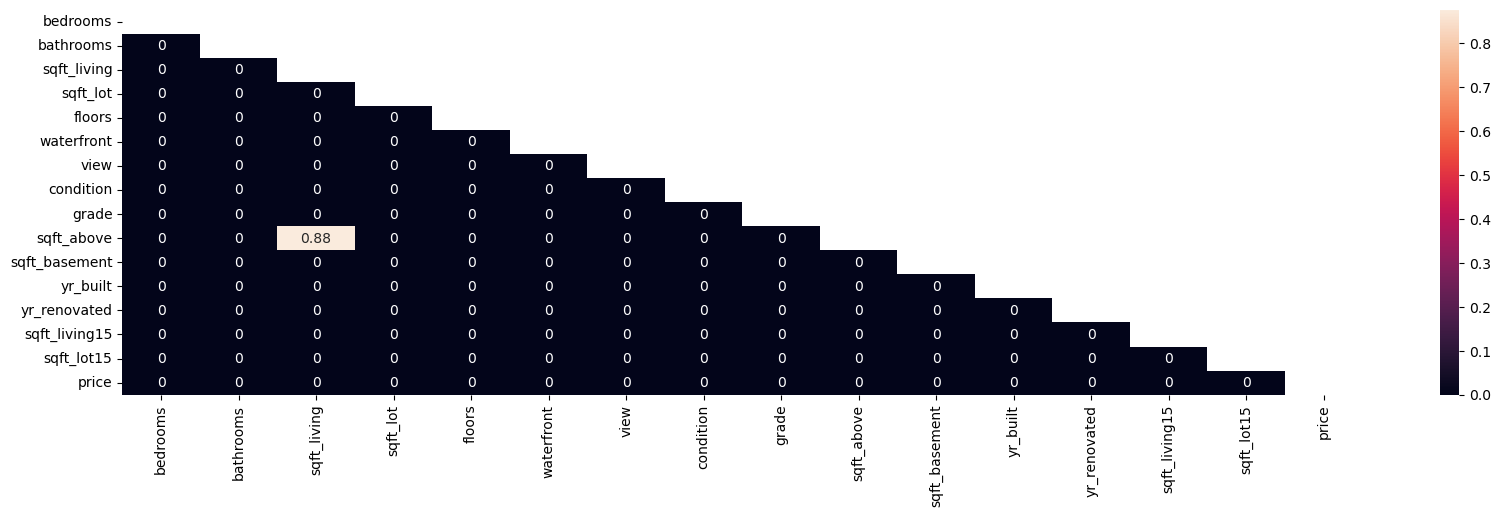

In [44]:
#heatmap
correlations_matrix = correlations_matrix.fillna(0)
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(20, 5))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

Based on above analysis, it look that the correlations between features are low. 

### Variance Inflation Factor 

In [45]:
# Checking multicolinearity between features 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
vif = add_constant(df_final)

threshold = 10

while True:
    values = [variance_inflation_factor(np.array(vif), i)
              for i in range(len(vif.columns))][1:]
    display(pd.DataFrame(values, index=vif.columns[1:]).sort_values(0))
    if max(values) > threshold:
        col_index = values.index(max(values)) + 1
        column_name = vif.columns[col_index]
        vif = vif.drop(column_name, axis=1)
    else:
        break
vif

,0
zipcode_98148,1.159155
yr_renovated,1.173073
zipcode_98024,1.252290
zipcode_98010,1.285228
zipcode_98039,1.313405
...,...
grade,4.005463
price,5.213781
sqft_above,inf
sqft_basement,inf


,0
zipcode_98148,1.159155
yr_renovated,1.173073
zipcode_98024,1.252290
zipcode_98010,1.285228
zipcode_98039,1.313405
...,...
sqft_living15,3.283478
bathrooms,3.445974
grade,4.005463
price,5.213781


,const,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,1.0,3,1.00,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,221900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1.0,3,2.25,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,538000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,2,1.00,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,180000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,4,3.00,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,604000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1.0,3,2.00,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,510000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,1.0,3,2.50,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509,360000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21593,1.0,4,2.50,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200,400000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
21594,1.0,2,0.75,1350,2.0,0,0,3,7,1020,0,2009,0,1020,2007,402101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
21595,1.0,3,2.50,2388,2.0,0,0,3,8,1600,0,2004,0,1410,1287,400000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
[col for col in df_final.columns if col not in vif] #checking column we might remove according to VIF analysis

['sqft_living']

In [47]:
df4 = df1.drop(['sqft_living'], axis=1) #removing the sqft_living column from the dataset with price log transformed

### model without Sqft_living

In [48]:
X = df4.drop(['price'], axis=1)
y = df4["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_std, y_train)

predictions = lr.predict(X_test_std)
print("R2:", lr.score(X_test_std, y_test))
print("MAE:", mean_absolute_error(predictions, y_test))
print("RMSE:", mean_squared_error(predictions, y_test, squared=False))

R2: 0.8746462898697815
MAE: 0.13508130505266183
RMSE: 0.1847710808722178


In [49]:
# target variable scaling inversed: 
y_test_unscaled = y_test.apply(lambda x: np.exp(x))
predictions_unscaled = pd.Series(predictions).apply(lambda x: np.exp(x))

rmse = mean_squared_error(y_test_unscaled, predictions_unscaled, squared=False)
mae = mean_absolute_error(y_test_unscaled, predictions_unscaled)
print("MAE:", mae)
print("RMSE:", rmse)

MAE: 75542.01224562459
RMSE: 150048.20400715206


<Axes: ylabel='price'>

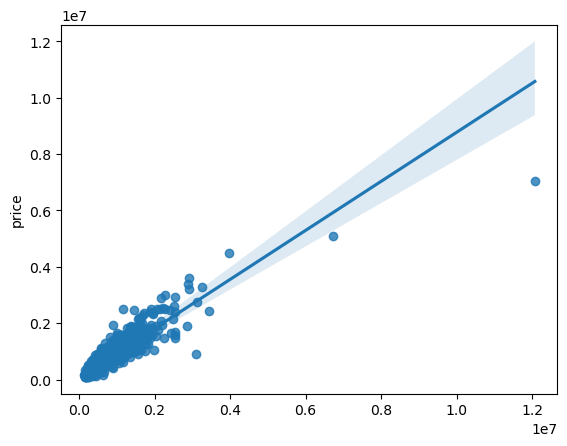

In [50]:
sns.regplot(x=predictions_unscaled, y=y_test_unscaled)

### model without Sqft_living and outliers removed

In [51]:
#removing outliers 
df5 = remove_outliers(df4, ['bedrooms', 'bathrooms', 'sqft_lot', 'sqft_basement'])

In [52]:
X = df5.drop(['price'], axis=1)
y = df5["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_std, y_train)

predictions = lr.predict(X_test_std)
print("R2:", lr.score(X_test_std, y_test))
print("MAE:", mean_absolute_error(predictions, y_test))
print("RMSE:", mean_squared_error(predictions, y_test, squared=False))

R2: 0.8804370670963902
MAE: 0.12691169213185172
RMSE: 0.16928936383242463


In [53]:
# target variable scaling inversed: 
y_test_unscaled = y_test.apply(lambda x: np.exp(x))
predictions_unscaled = pd.Series(predictions).apply(lambda x: np.exp(x))

rmse = mean_squared_error(y_test_unscaled, predictions_unscaled, squared=False)
mae = mean_absolute_error(y_test_unscaled, predictions_unscaled)
print("MAE:", mae)
print("RMSE:", rmse)

MAE: 63451.22286497719
RMSE: 102110.25841504497


<Axes: ylabel='price'>

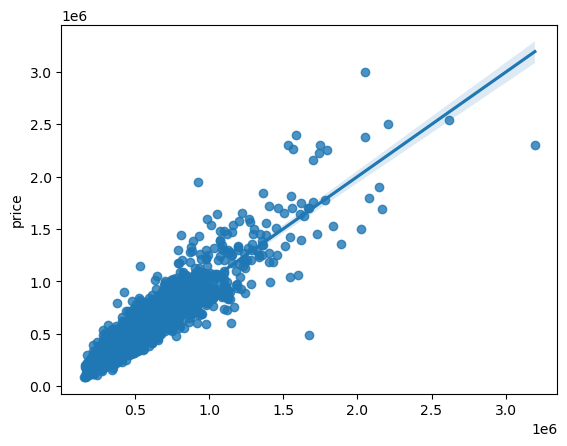

In [54]:
sns.regplot(x=predictions_unscaled, y=y_test_unscaled)

After removing outliers from features: bedrooms, bathrooms, sqft_lot and sqft_basement as well as removing the column for sqft_living we managed to improve the model so it generalizes better and achieves lower errors. Model without outliers also proposes good results (high R2 and low variance of errors). 

Next steps: 
- we could test the model with log scaling features 
- model could be also trained in order to focus on selected features (e.g. combined with the analysis of the 650K+ houses). 